### 1. Installing Libraries

In [2]:
!pip install pandas matplotlib transformers torch

### 2. Suppressing Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 3. Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

### 4. Loading Commentary CSV from GitHub

In [5]:
# Link to GitHub file
url = "https://raw.githubusercontent.com/Dilwanthennakoon/Icc-world-cup-stats-project/main/commentary_2023.csv"

# Read the data
df = pd.read_csv(url)

# View first few rows
df.head()

,Unnamed: 0,commentary
0,19,Travis Head | Player of the Match - 137(120): ...
1,20,Adam Zampa: Interesting to see the strategy to...
2,21,"Mitchell Starc: He (Cummins) was phenomenal, h..."
3,22,Steve Smith: Incredible feeling! Atmosphere wa...
4,23,Mitch Marsh: Pure elation right now. Been the ...


### Note (About GitHub file link)
- The commentary CSV file was hosted in the GitHub repositary created by our group leader **Dilwan Thennakoon**. All members worked in separate brances within this shared repositary.

### 5. Loading the Hugging Face Sentiment Model

In [6]:
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

Device set to use cpu


### Note (Why choose this model)
- **`cardiffnlp/twitter-roberta-base-sentiment`** model was selected because it is trained on short, real-world texts like tweets, which are similar to cricket commentary in length and style.
- It provides 3 sentiment classes **(Positive, Neutral, Negative)** allowing us to capture the emotional tone more accurately than simple 2-class models.

### 6. Applying Sentiment to Commentary

In [7]:
# Define a mapping for the string labels
label_mapping = {'LABEL_0': 'negative', 'LABEL_1': 'neutral', 'LABEL_2': 'positive'}

# Apply the model to each commentary line and map the labels
df['sentiment'] = df['commentary'].apply(lambda x: label_mapping[sentiment_model(x)[0]['label']])

# View updated data
df.head()

,Unnamed: 0,commentary,sentiment
0,19,Travis Head | Player of the Match - 137(120): ...,positive
1,20,Adam Zampa: Interesting to see the strategy to...,positive
2,21,"Mitchell Starc: He (Cummins) was phenomenal, h...",positive
3,22,Steve Smith: Incredible feeling! Atmosphere wa...,positive
4,23,Mitch Marsh: Pure elation right now. Been the ...,positive


### 7. Analyzing Most Common Sentiment

In [8]:
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f"The most common sentiment in the 2023 Final commentary is: {most_common_sentiment}")

The most common sentiment in the 2023 Final commentary is: neutral


### 8. Showing Few Random Examples Of Neutral Lines

In [9]:
neutral_examples = df[df['sentiment'] == 'neutral'].sample(5)
neutral_examples[['commentary', 'sentiment']]

,commentary,sentiment
127,"Jadeja to Labuschagne, 1 run, tossed up full o...",neutral
20,"Siraj to Head, 1 run, full ball on the stumps,...",neutral
59,"Kuldeep Yadav to Labuschagne, 1 run, Labuschag...",neutral
11,"21:31 local, 16:01 GMT, 21:31 IST: Write off A...",neutral
372,Bumrah round the wicket to Head and two slips ...,neutral


### 9. Visualizing Sentiment Spread ( Pie Chart )

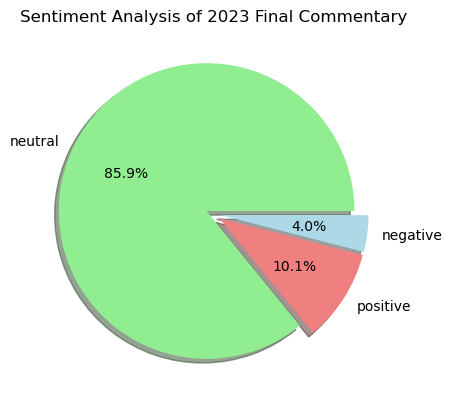

In [10]:
colors = ['lightgreen', 'lightcoral', 'lightblue']
explode = (0.05, 0.05, 0.05)  # separate pie parts

df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title("Sentiment Analysis of 2023 Final Commentary")
plt.ylabel('')
plt.show()

### Note (Understanding Most Common Neutral Sentiment)
- Observed that the model classified many commentary lines as **Neutral**.
- This is expected and appropriate, because sports commentary often contains factual or descriptive sentences without emotional tone.
- In fact, our analysis showed that **Neutral** was the most common sentiment overall.  
- This reflects the formal, objective nature of cricket broadcasting, where emotion is not always expressed in every line.

### 10. Save the Updated Dataset with Sentiment

In [11]:
df.to_csv("ICC Men's Cricket World Cup-Task 03.csv", index=False)